# Занятие 3

Исследовательский анализ данных (построение графиков, выявление связи между переменными). Визуализация результатов. Построение графиков при помощи matplotlib. Настройки стилей оформления графиков. Трехмерные графики, анимация.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Линейные графики

Линейные графики — это последовательность точек данных на линии. Каждая точка состоит из пары значений (x, y), которые перенесены на график в соответствии с масштабами осей (x и y).

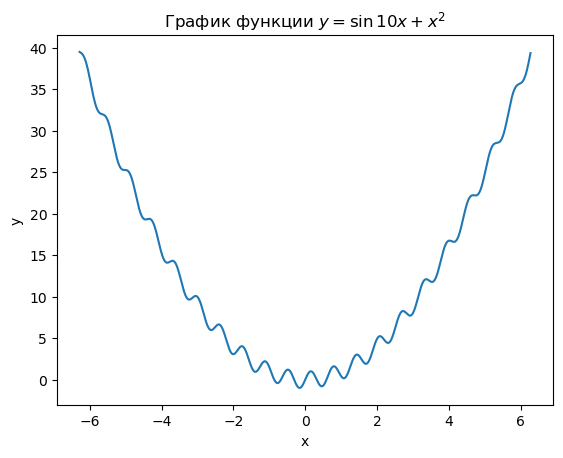

In [2]:
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.sin(10*x) + x**2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $y = \sin{10x} + x^{2}$')
plt.show()

Для анализа воспользуемсся датасетом по мультфильмам: https://www.kaggle.com/datasets/asaniczka/52000-animation-movie-details-dataset-2024?select=Animation_Movies.csv

In [3]:
df = pd.read_csv('Animation_Movies.csv')

In [4]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [6]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


Построим график показывающий как менялсь число выпусаемых анимаций по датам выпуска.

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
df['release_date'].value_counts()

2017-01-01    291
2013-01-01    220
2011-01-01    219
2006-01-01    203
2005-01-01    202
             ... 
2016-05-19      1
1956-01-26      1
1917-05-07      1
1977-09-18      1
1984-12-08      1
Name: release_date, Length: 16893, dtype: int64

In [9]:
df['release_date'].min()

Timestamp('1878-05-07 00:00:00')

In [10]:
df['release_date'].max()

Timestamp('2026-12-31 00:00:00')

In [11]:
df[df['release_date'] == df['release_date'].min()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
4025,751212,The Musician Monkey,6.048,21,Released,1878-05-07,0,1,False,NaN,...,xx,Le Singe Musicien,A pre-cinematograph colour animation of the mo...,1.031,/fx2gnyV2n9KdOCyGzQtVnpB9bIg.jpg,NaN,Animation,NaN,France,No Language
4592,766094,The Magic Rosette,5.583,17,Released,1878-05-07,0,1,False,NaN,...,xx,La Rosace Magique,Praxinoscope strip of a shifting rosette. Seri...,1.108,/5zeVMAp3R4QHGarSc4Bf3B1uBY2.jpg,NaN,Animation,NaN,France,No Language
7015,921939,Le Jeu de Corde,4.625,8,Released,1878-05-07,0,1,False,NaN,...,xx,Le Jeu de Corde,Praxinoscope of a girl in a blue dress skippin...,0.600,/iKTR6sHpR0C7LEyV6l9UA1JdTHH.jpg,NaN,Animation,NaN,France,No Language
7018,921940,"Zim, Boum, Boum",4.125,8,Released,1878-05-07,0,1,False,NaN,...,xx,"Zim, Boum, Boum",Praxinoscope animation of a green-suited boy w...,1.400,/ftOeRoWuBG23f1Dqd3Vmc0A2GQm.jpg,NaN,Animation,NaN,France,No Language
8489,921930,Dancing on the Rope,4.200,5,Released,1878-05-07,0,1,False,NaN,...,en,La Danse sur la Corde,Early Praxinoscope strip showing a girl dancin...,0.600,/hIOqTlvdky4Z4edd0QiB1x04npz.jpg,NaN,Animation,NaN,France,No Language
8510,922513,L'Équilibriste,4.200,5,Released,1878-05-07,0,1,False,NaN,...,xx,L'Équilibriste,Praxinoscope animation of a child laying down ...,0.600,/fVEfsu10MxcXG5s8DPXCTfqk7ZY.jpg,NaN,Animation,NaN,France,No Language
9757,922010,Les Papillons,4.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,Les Papillons,Praxinoscope animation of a butterfly flutteri...,0.600,/nH9Lsvdo3icACe3AaW6j6YrbdR2.jpg,NaN,Animation,NaN,France,No Language
9758,922011,Le Trapèze,5.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,Le Trapèze,Praxinoscope animation of a man spinning aroun...,0.961,/ykhF8AiAhSeKTDl1FfnlR7le7I.jpg,NaN,Animation,NaN,France,No Language
9759,922013,La Charmeuse,5.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,La Charmeuse,Praxinoscope animation of a girl charming a fl...,0.600,/bTVPmt4Nl0myTOy9cKaiRFfrcGd.jpg,NaN,Animation,NaN,France,No Language
9760,922015,La Balançoire,4.500,4,Released,1878-05-07,0,1,False,NaN,...,xx,La Balançoire,Praxinoscope animation of two children playing...,0.600,/5r72HjkKXHoMg3zvXPXuAA6CaKL.jpg,NaN,Animation,NaN,France,No Language


In [12]:
df[df['release_date'] == df['release_date'].max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
26469,1201768,On The Edge: Donnie Dares!,0.0,0,Released,2026-12-31,0,75,False,NaN,...,en,On The Edge: Donnie Dares!,Lots of people have never heard of these six e...,0.0,/63iMSK87z0GdXH0eEl0h7EF0cS3.jpg,NaN,Animation,Studio 100 Animation,United States of America,NaN


In [13]:
df_gr = df.groupby(['release_date']).agg('count')['id']
df_gr

release_date
1878-05-07    25
1885-01-01     1
1892-10-28     3
1894-12-15     2
1896-08-01     1
              ..
2025-10-11     1
2025-11-20     1
2025-12-26     1
2026-10-09     1
2026-12-31     1
Name: id, Length: 16893, dtype: int64

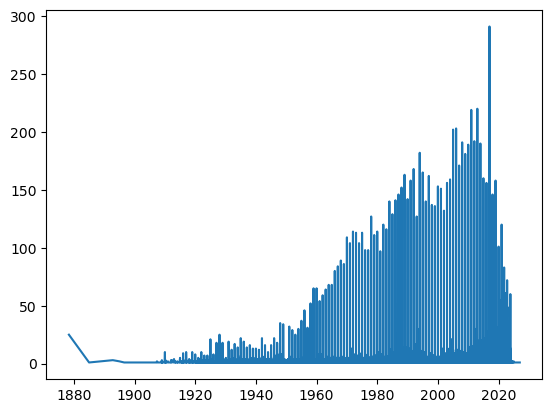

In [14]:
plt.plot(df_gr)
plt.show()

Добавим месяц и год выпуска анимации.

In [15]:
df['month_release'] = df['release_date'].dt.month

In [16]:
df['year_release'] = df['release_date'].dt.year

In [17]:
df_gr_m = df.groupby(['month_release']).agg('count')['id']
df_gr_m

month_release
1.0     11960
2.0      2837
3.0      3557
4.0      2958
5.0      3139
6.0      4063
7.0      3101
8.0      2848
9.0      3783
10.0     4250
11.0     3611
12.0     3701
Name: id, dtype: int64

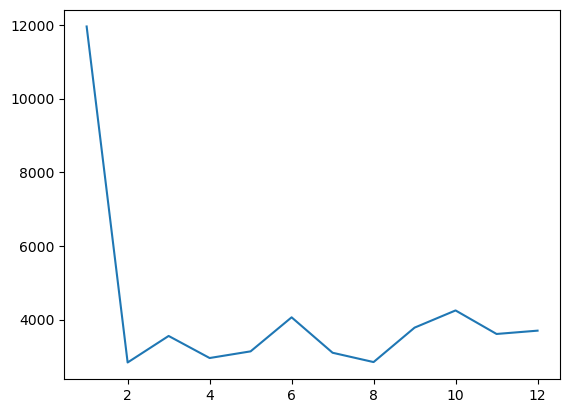

In [18]:
plt.plot(df_gr_m)
plt.show()

In [19]:
df_gr_y = df.groupby(['year_release']).agg('count')['id']
df_gr_y

year_release
1878.0      25
1885.0       1
1892.0       3
1894.0       2
1896.0       1
          ... 
2022.0    2247
2023.0    1907
2024.0     103
2025.0      10
2026.0       2
Name: id, Length: 130, dtype: int64

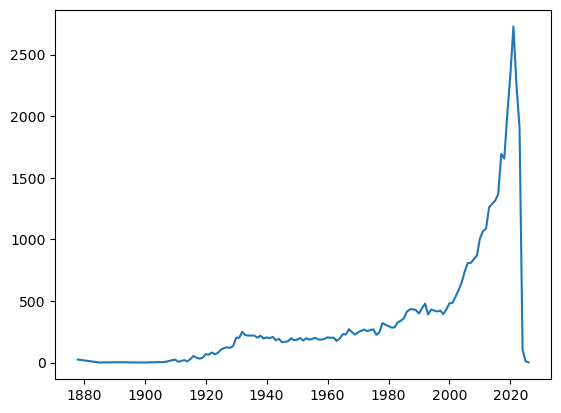

In [20]:
plt.plot(df_gr_y)
plt.show()

## Гистограммы

Гистограмма состоит из примыкающих прямоугольников, расположенных вдоль оси x, которые разбиты на дискретные интервалы, их называют bins. Их площадь пропорциональна частоте конкретного интервала. Такой способ визуализации часто используют в статистике для демонстрации распределения.

Для представления гистограммы в pyplot есть функция hist(). У нее также есть особенности, которых не найти у других функций, отвечающих за создание графиков. hist() не только рисует гистограмму, но также возвращает кортеж значений, представляющих собой результат вычислений гистограммы. 

In [21]:
arr = np.random.randint(0, 1000, 500)
arr

array([588, 554, 116, 432, 792, 133, 226, 741, 821, 114, 402,  83, 502,
       437, 922, 203,  34, 244, 622,  24, 816, 207, 466, 532, 886, 482,
       626, 545, 530, 193,  70, 343, 597, 432, 138, 256, 345, 851,  40,
       645, 385, 156, 789, 217, 908, 816, 838, 131, 309, 946, 975, 169,
       819, 265, 294,  46, 722, 248, 638,  13, 500, 683, 825, 594, 966,
       528, 229, 241, 696, 162, 572, 251, 387, 450, 478, 440, 424, 705,
        34, 167, 519, 510, 898, 191, 477, 881, 843, 907, 125, 538, 445,
       958, 324,   5, 501, 821, 546, 684, 395, 345, 515, 868, 533, 881,
       297, 430, 207, 511,  71,  75,   5, 764, 337,  94, 977, 738, 224,
       154,  89,  83, 928, 930, 504, 526, 171, 843, 428, 240, 135, 606,
       187, 166, 906, 187, 239, 466, 355, 568, 229, 670, 703, 451, 952,
        40, 102, 746, 284, 721, 421, 583, 734, 816, 536, 737,  33, 384,
        21, 561, 832, 713, 524, 806, 139, 839, 453, 502, 232, 613, 716,
       569, 735, 188, 624, 216, 295, 993, 405, 321,  12, 776, 94

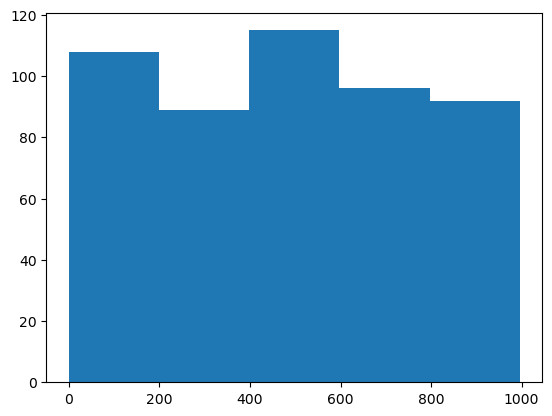

In [22]:
n, bin, patches = plt.hist(arr, bins = 5)
plt.show()

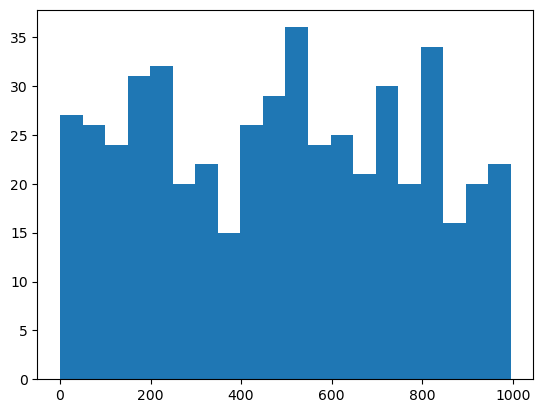

In [23]:
n, bin, patches = plt.hist(arr, bins = 20)
plt.show()

## Столбчатые диаграммы

Столбчатые диаграммы похожи на гистограммы, но на оси x тут располагаются не числовые значения, а категории.

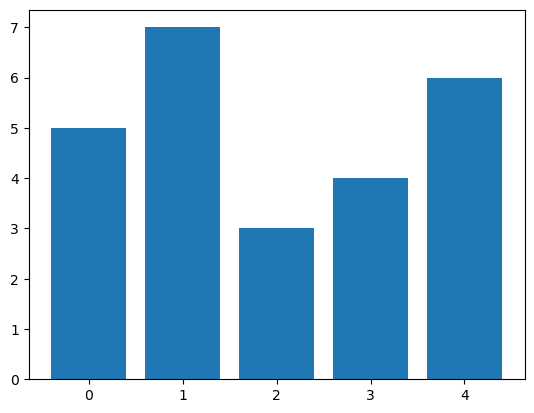

In [24]:
index = [0,1,2,3,4]
values = [5,7,3,4,6]
plt.bar(index,values)
plt.show()

На диаграмме видно, что метки на оси x написаны под каждым столбцом. Поскольку каждый из них относится к отдельной категории, правильнее обозначать их строками. Для этого используется функция xticks(). А для правильного размещения нужно передать список со значениями позиций в качестве первого аргумента в той же функции. Результатом будет такая диаграмма.

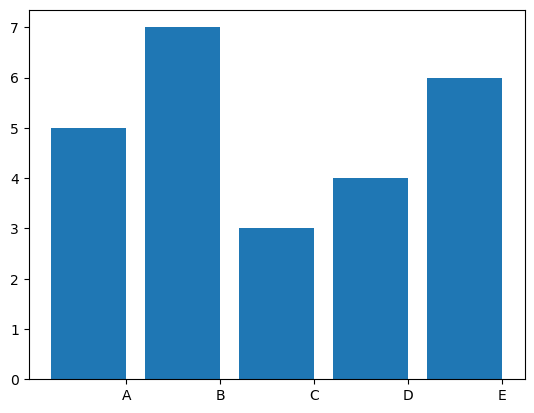

In [25]:
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.bar(index, values1)
plt.xticks(index+0.4,['A','B','C','D','E'])
plt.show()

Добавить величины стандартного отклонения с помощью аргумента yerr вместе с соответствующими значениями. Часто этот аргумент используется вместе с error_kw, который принимает друге аргументы, отвечающие за представление погрешностей. Два из них — это eColor, который определяет цвета колонок погрешностей и capsize — ширину поперечных линий, обозначающих окончания этих колонок.

Еще один именованный аргумент — alpha. Он определяет степень прозрачности цветной колонки. Его значением может быть число от 0 до 1, где 0 — полностью прозрачный объект.

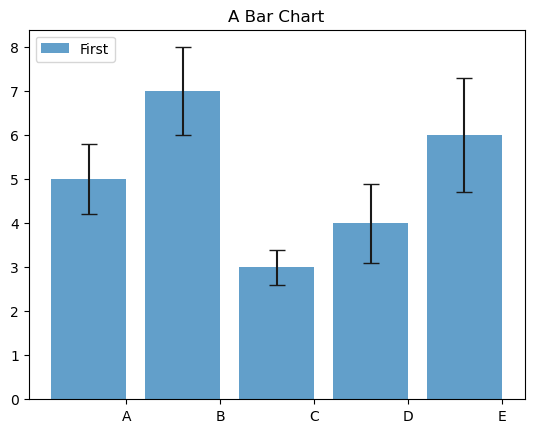

In [26]:
index = np.arange(5)
values1 = [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Bar Chart')
plt.bar(index, values1, yerr=std1, error_kw={'ecolor':'0.1','capsize':6},alpha=0.7,label='First')
plt.xticks(index+0.4,['A','B','C','D','E'])
plt.legend(loc=2)
plt.show()

Для построения вертикальной столбчатой диаграммы есть специальная функция barh().

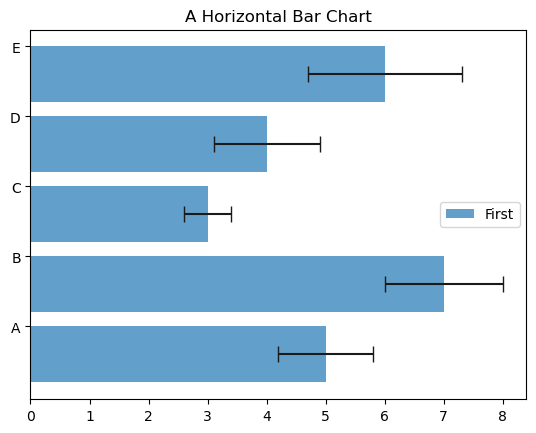

In [27]:
index = np.arange(5)
values1 = [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Horizontal Bar Chart')
plt.barh(index, values1, xerr=std1, error_kw={'ecolor':'0.1','capsize':6},alpha=0.7,label='First')
plt.yticks(index+0.4,['A','B','C','D','E'])
plt.legend(loc=5)
plt.show()

Можно строить многорядные столбчатые диаграммы:

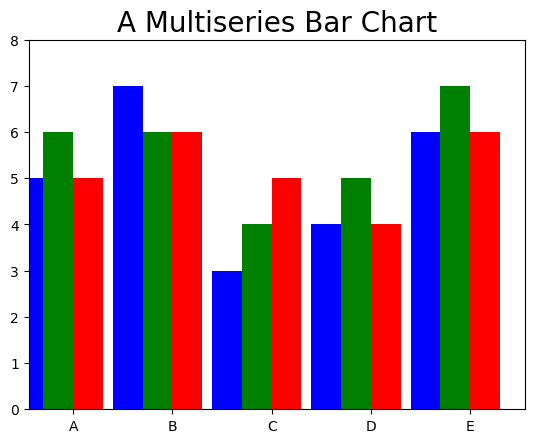

In [28]:
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.axis([0,5,0,8])
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.bar(index, values1, bw, color='b')
plt.bar(index+bw, values2, bw, color='g')
plt.bar(index+2*bw, values3, bw, color='r')
plt.xticks(index+1.5*bw,['A','B','C','D','E'])
plt.show()

В случае с горизонтальными многорядными столбчатыми диаграммами все работает по тому же принципу. Функцию bar() нужно заменить на соответствующую barh(), а также не забыть заменить xticks() на yticks().

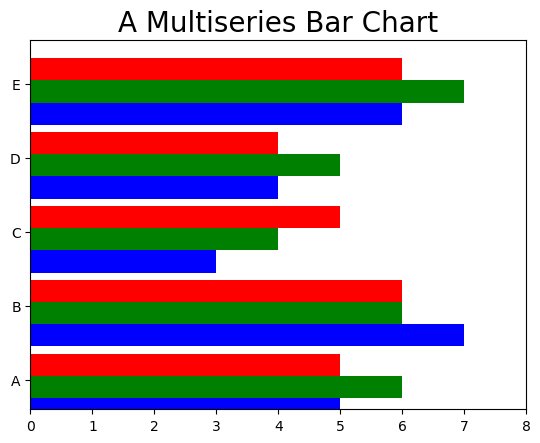

In [29]:
index = np.arange(5)
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.axis([0,8,0,5])
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.barh(index, values1, bw, color='b')
plt.barh(index+bw, values2, bw, color='g')
plt.barh(index+2*bw, values3, bw, color='r')
plt.yticks(index+0.4,['A','B','C','D','E'])
plt.show()

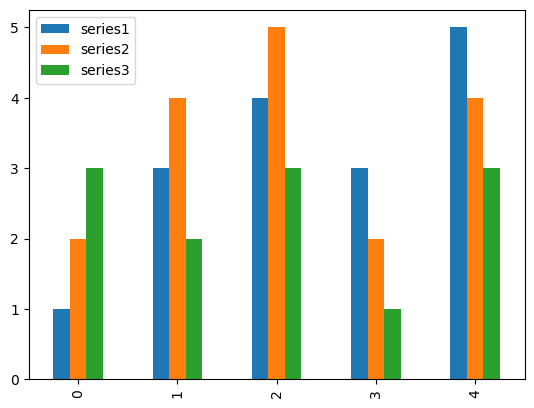

In [30]:
import pandas as pd

index = np.arange(5)
data = {'series1': [1,3,4,3,5],
        'series2': [2,4,5,2,4],
        'series3': [3,2,3,1,3]}
df1 = pd.DataFrame(data)
df1.plot(kind='bar')
plt.show()

Еще один способ представления многорядного столбчатого графика — сложенная форма, где каждый столбец установлен поверх другого. Это особенно полезно в том случае, когда нужно показать общее значение суммы всех столбцов.

Для превращения обычного многорядного столбчатого графика в сложенный нужно добавить именованный аргумент bottom в каждую функцию bar(). Каждый объект Series должен быть присвоен соответствующему аргументу bottom. Результатом будет сложенный столбчатый график.

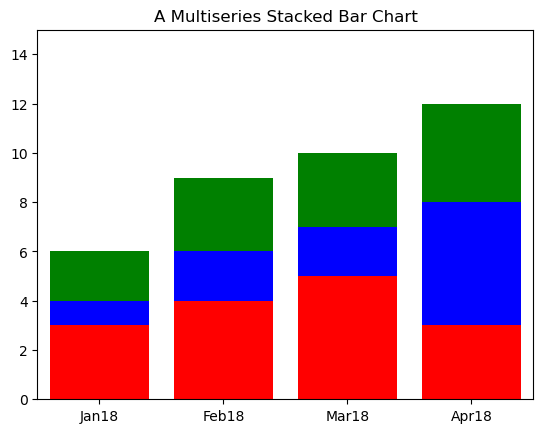

In [31]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([-0.5,3.5,0,15])
plt.title('A Multiseries Stacked Bar Chart')
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)
plt.bar(index,series3,color='g',bottom=(series2+series1))
plt.xticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

Для создания аналогичного горизонтального графика нужно заменить bar() на barh(), функцию xticks() необходимо поменять местами с yticks(), потому что метки категорий теперь будут расположены по оси y. После этого будет создан следующий горизонтальный график.

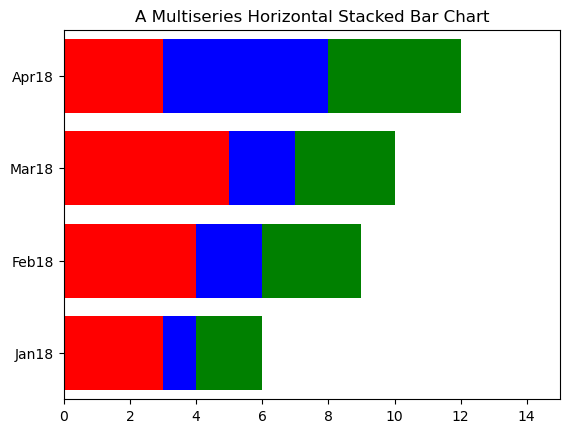

In [32]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([0,15,-0.5,3.5])
plt.title('A Multiseries Horizontal Stacked Bar Chart')
plt.barh(index,series1,color='r')
plt.barh(index,series2,color='b',left=series1)
plt.barh(index,series3,color='g',left=(series2+series1))
plt.yticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

До сих пор объекты Series разделялись только по цветам. Но можно использовать, например, разную штриховку. Для этого сперва необходимо сделать цвет столбца белым и использовать именованный аргумент hatch для определения типа штриховки. Все они выполнены с помощью символов (|, /, -, \, *), соответствующих стилю столбца. Чем чаще он повторяется, тем теснее будут расположены линии. Так, /// — более плотный вариант чем //, а этот, в свою очередь, плотнее /.

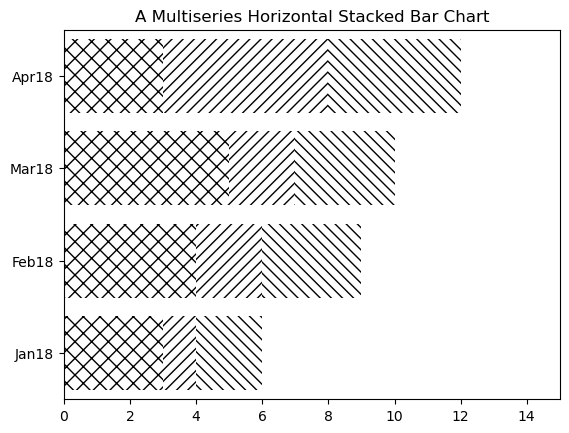

In [33]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([0,15,-0.5,3.5])
plt.title('A Multiseries Horizontal Stacked Bar Chart')
plt.barh(index,series1,color='w',hatch='xx')
plt.barh(index,series2,color='w',hatch='///',left=series1)
plt.barh(index,series3,color='w',hatch='\\\\\\',left=(series2+series1))
plt.yticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

## Круговые диаграммы

Круговые диаграммы — распространенный способ показать, какую часть от общего количества (например, годового объема продаж) составляют отдельные значения (например, квартальный объем продаж). Круговые диаграммы обычно используются для сравнения групп.

Этот тип графика можно получить с помощью функции pie(). Задать последовательность цветов можно используя аргумент colors. В таком случае придется присвоить список строк, каждая из которых будет содержать название цвета. Еще одна возможность — добавление меток каждой доле. Для этого есть labels, которой присваивает список строк с метками в последовательности.

Чтобы диаграмма была идеально круглой, необходимо в конце добавить функцию axix() со строкой equal в качестве аргумента.

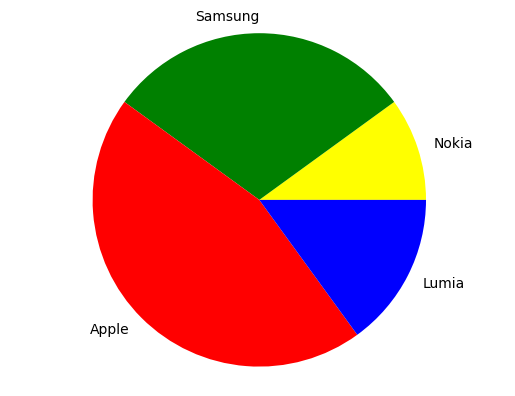

In [34]:
labels = ['Nokia','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['yellow','green','red','blue']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show()

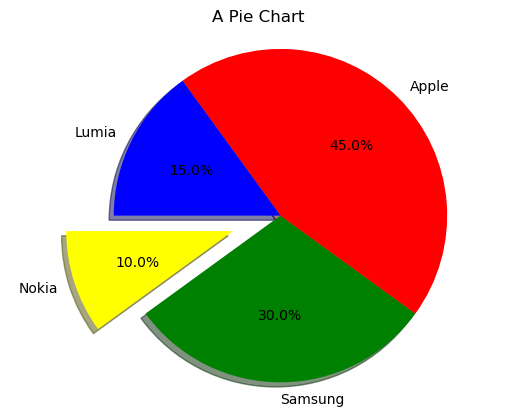

In [35]:
labels = ['Nokia','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['yellow','green','red','blue']
explode = [0.3,0,0,0]
plt.title('A Pie Chart')
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

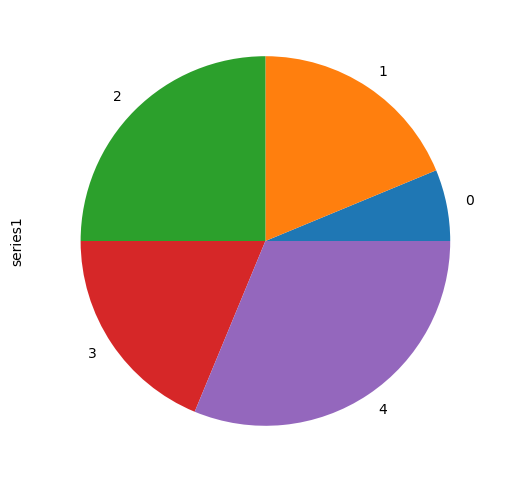

In [36]:
data = {'series1': [1,3,4,3,5],
        'series2': [2,4,5,2,4],
        'series3': [3,2,3,1,3]}
df1 = pd.DataFrame(data)
df1['series1'].plot(kind='pie', figsize=(6,6))
plt.show()

In [37]:
df['production_countries'].value_counts()

United States of America           12836
Japan                               5182
France                              2136
United Kingdom                      1854
Canada                              1616
                                   ...  
Belize, France, Mexico                 1
South Korea, France                    1
United Kingdom, Norway                 1
Russia, Hungary                        1
Bosnia and Herzegovina, Croatia        1
Name: production_countries, Length: 1096, dtype: int64

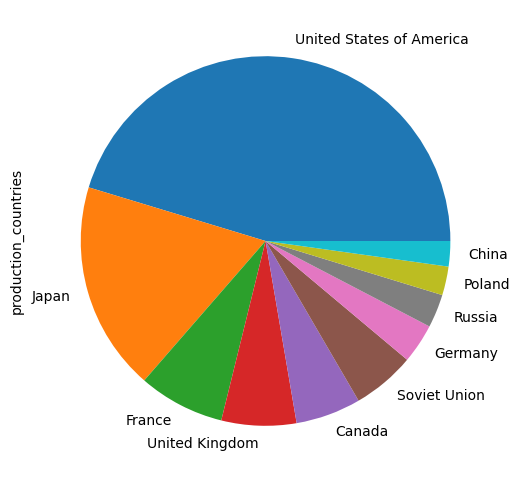

In [38]:
df['production_countries'].value_counts().head(10).plot(kind='pie', figsize=(6,6))
plt.show()

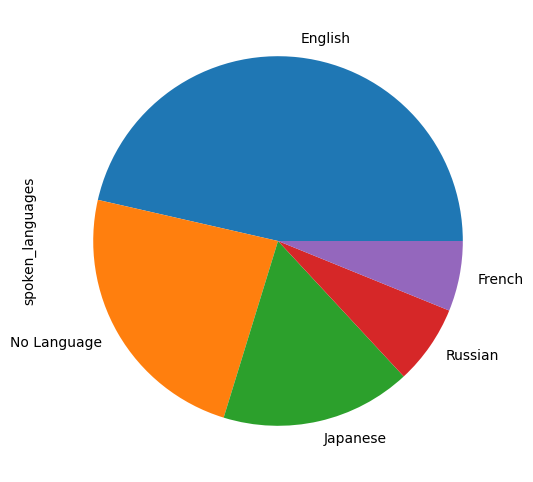

In [39]:
df['spoken_languages'].value_counts().head(5).plot(kind='pie', figsize=(6,6))
plt.show()

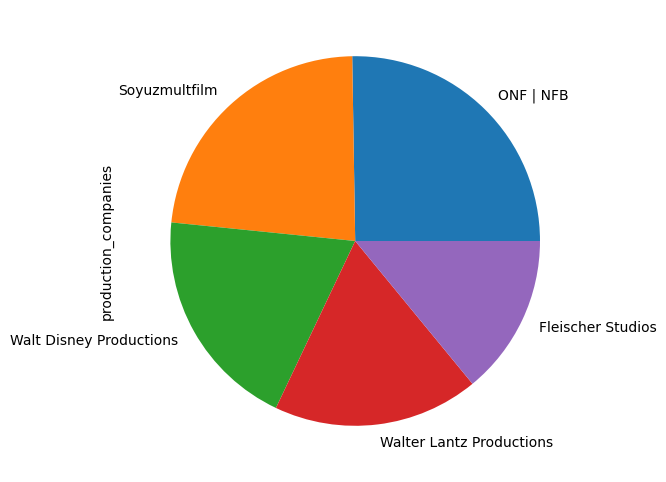

In [40]:
df['production_companies'].value_counts().head(5).plot(kind='pie', figsize=(6,6))
plt.show()

### Графики для отображения выбросов в данных

*Повторение материала прошлого занятия*

"Ящик с усами" (диаграмма размаха, усиковая диаграмма, англ. box-and-whiskers diagram, box-and-whiskers plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

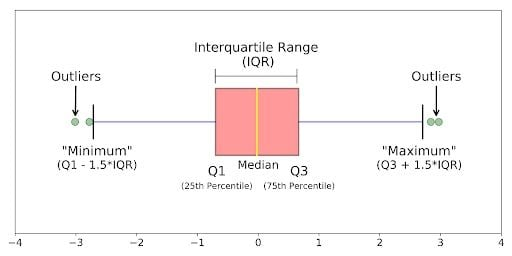

Подробнее про boxplot можно посмотреть: https://builtin.com/data-science/boxplot

### Типы boxplots

In [41]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,month_release,year_release
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000,49808.000000,49808.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233,5.729622,1995.695109
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913,3.822580,28.183376
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1878.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000,2.000000,1981.000000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000,6.000000,2007.000000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000,9.000000,2018.000000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000,12.000000,2026.000000


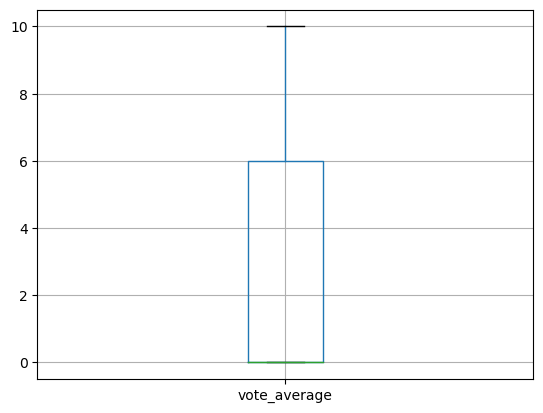

In [42]:
df[['vote_average']].boxplot();

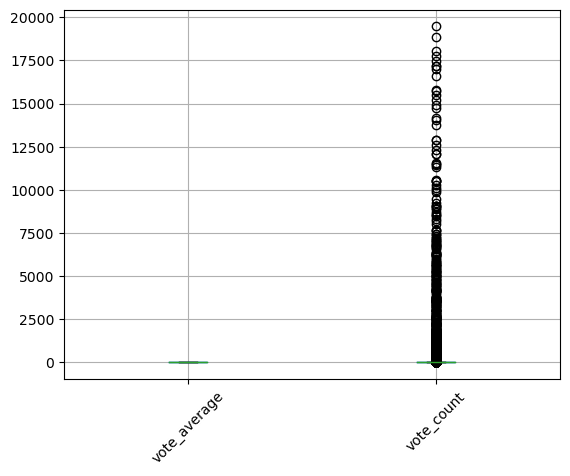

In [43]:
df[['vote_average', 'vote_count']].boxplot()
plt.xticks(rotation = 45);

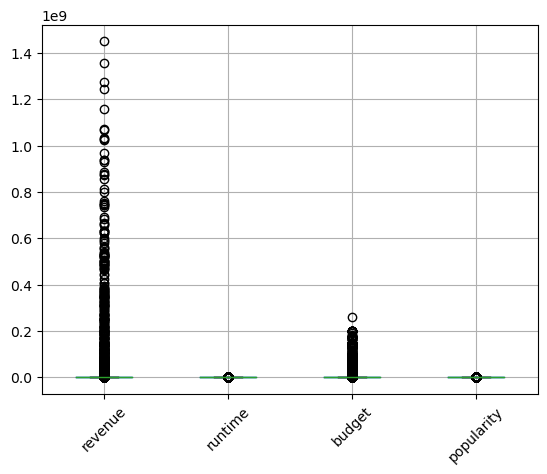

In [44]:
df[['revenue', 'runtime', 'budget', 'popularity']].boxplot()
plt.xticks(rotation = 45);

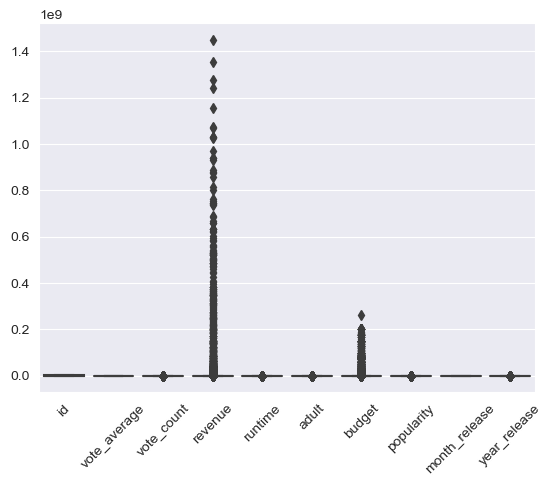

In [45]:
sns.set_style('darkgrid')

sns.boxplot(data=df)
plt.xticks(rotation = 45);

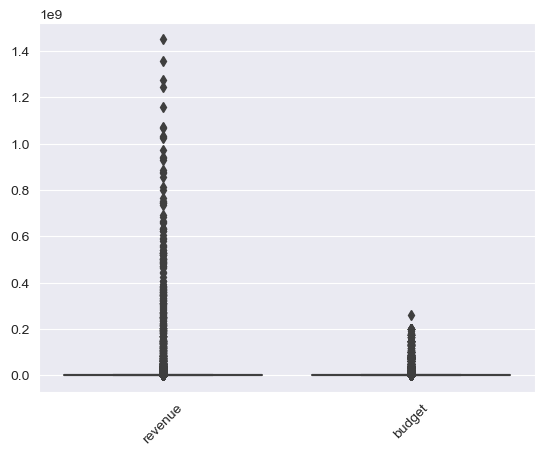

In [46]:
sns.set_style('darkgrid')

sns.boxplot(data=df[['revenue', 'budget']])
plt.xticks(rotation = 45);

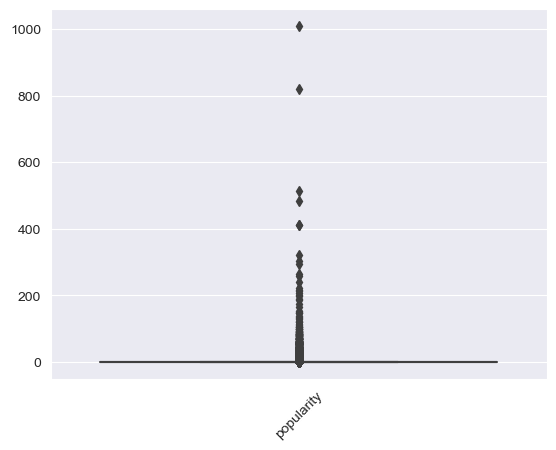

In [47]:
sns.set_style('darkgrid')

sns.boxplot(data=df[['popularity']])
plt.xticks(rotation = 45);

In [48]:
iris = sns.load_dataset('iris')

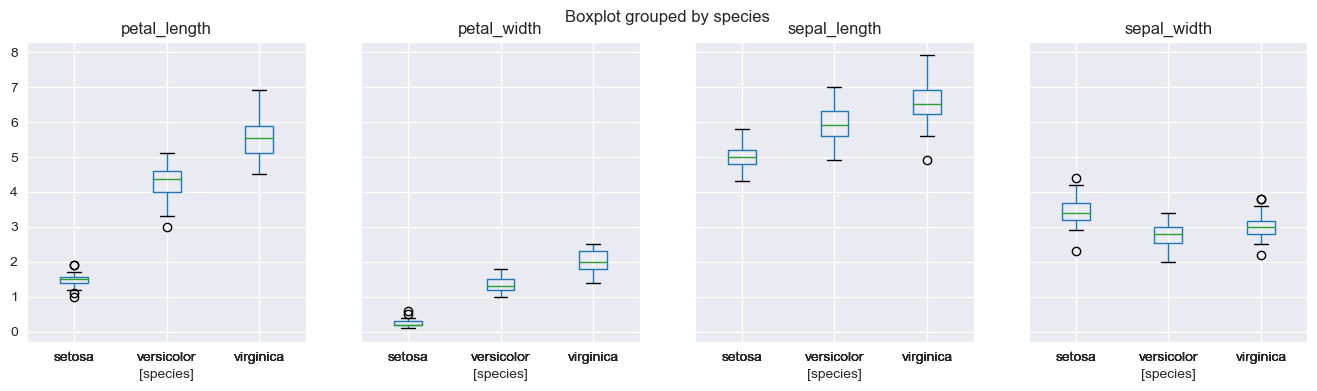

In [49]:
iris.boxplot(by='species', figsize=(16, 4), layout=(1, 4));

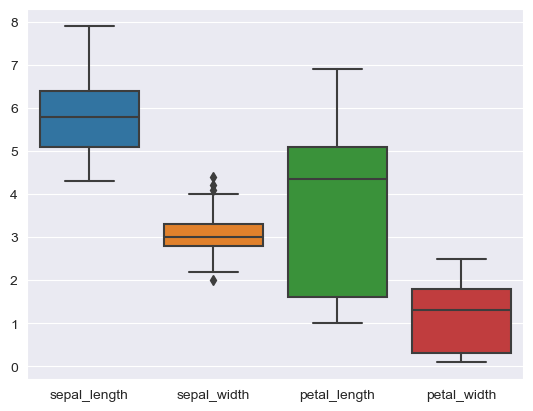

In [50]:
sns.set_style('darkgrid')

sns.boxplot(data=iris);

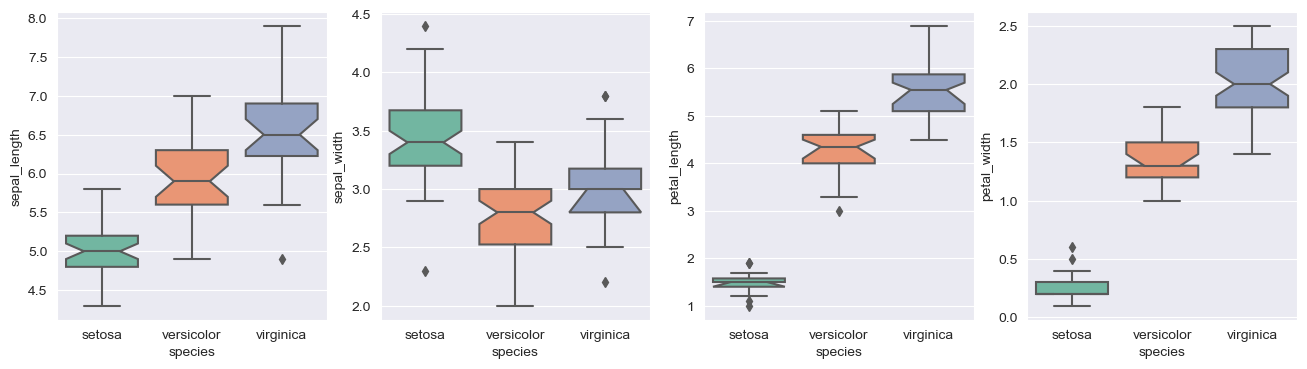

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

# Explicitly list the variables to map onto subplots
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# For each of the variables, use a different subplot
for i, var in enumerate(variables):
    species_data = iris[[var, 'species']]
    sns.boxplot(x='species', y=var, data=species_data, ax=axes[i], palette='Set2',
                notch=True, bootstrap=10000)

## Матрица корреляций

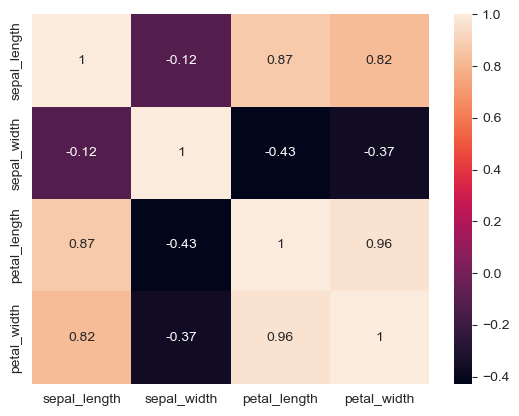

In [52]:
sns.heatmap(iris.corr(), annot = True);

## Трёхмерные графики

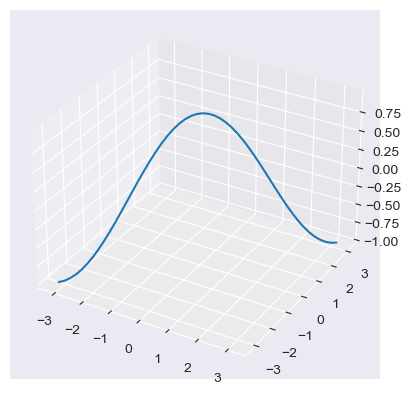

In [56]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='parametric curve');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


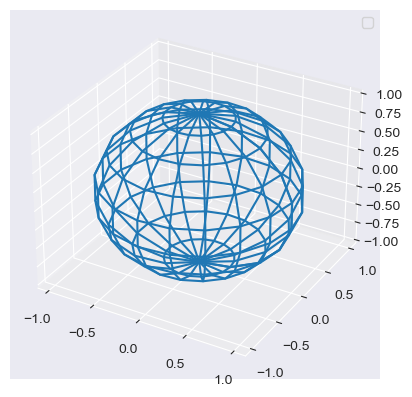

In [59]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


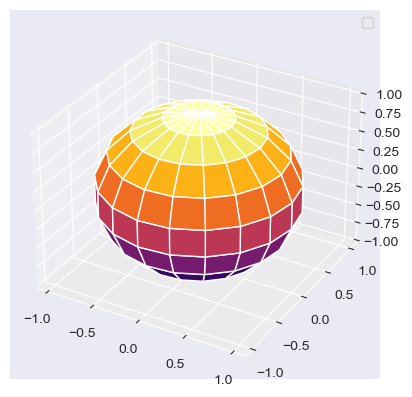

In [61]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')
ax.legend();

Подробнее про типы графиков в matplotlib и seaborn можно посмотреть по ссылкам: https://matplotlib.org/stable/gallery/index и https://matplotlib.org/stable/gallery/index.

## Практические задания

Используя данные по телепередачам выполните следующие задания.

Подробное описание датасета: https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv

In [53]:
netflix_titles = pd.read_csv('netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. Постройте графики зависимости числа телепередач по годам (линейный и столбчатый). В качестве года выпуска используйте столбец 'release_year'.

2. Отобразите на одном графике с помощью столбчатой диаграммы динамику изменения числа фильмов (Movie) и телепередачь (TV Show).

3. В какой стране выпущено больше всего фильмов, телепередач и суммарно фильмов и телепередач. Постройте круговые диаграммы.

4. Какой рейтинг встречается чаще всего. Постройте круговую диаграмму, столбчатую диаграмму.

Используя данные https://www.kaggle.com/datasets/fekihmea/sales-store-overview выполните следующие задания.

5. Проанализируйте (определите границы выбросов с помощью IQR метода, см. пред. занятие) выбросы в числовых столбцах. Постройте "ящики с усами" минимум 3-х типов.

In [54]:
df = pd.read_csv('SalesStore.csv')
df

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.00,DC
212,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10022901,Electronics,Printers,300,4,6.00,DC
213,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10002727,Electronics,Printers,300,4,6.00,DC
214,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.00,DC


6. В каком регионе было больше всего заказов? В каком регионе было больше всего заказов с количеством товара более 4 (столбец Quantity)?

7. В каком году было больше всего заказов (столбец Order_Date) и какие категории товаров (столбец Category) пользовались наибольшей популярностью?

8. В каком регионе было продано больше всего электроники (Electronics) за весь рассматриваемый период? за последний год представленный в данных?

9. Постройте круговую диаграмму по регионам и категориям товаров:

* учитывая все продажи

* учитывая только продажи в регионе East

* учитывая продажи начиная с 2022-06-15

* учитывая только продажи с Profit больше 5

10. Постройте матрицу корреляций для числовых признаков.